In [44]:
#we load the libraries needed
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt



#we load the datasets
articles_df = pd.read_csv("articles_2016_2024.csv")
comments_df = pd.read_csv("comments_2016_2024.csv")

print(articles_df.head())
print(comments_df.head())


                                         article_url  \
0  https://www.thejournal.ie/government-seeking-e...   
1  https://www.thejournal.ie/rishi-sunak-northern...   
2  https://www.thejournal.ie/migration-uk-eu-afte...   
3  https://www.thejournal.ie/irish-exports-highes...   
4  https://www.thejournal.ie/uk-bill-visa-non-eu-...   

                                        article_text article_date_created  \
0  THE GOVERNMENT IS to seek an “early warning sy...   6.43pm, 9 Feb 2021   
1  LAST UPDATE|16 Feb 2023\nBRITISH PRIME MINISTE...  8.01pm, 16 Feb 2023   
2  IT’S NOW OVER five years since the UK voted to...   9.00pm, 3 Oct 2021   
3  THE VALUE OF goods exported from Ireland rose ...  4.01pm, 15 Feb 2022   
4  TÁNAISTE LEO VARADKAR has said he will raise c...   3.42pm, 9 Dec 2021   

  article_date_updated  
0                  NaN  
1          16 Feb 2023  
2                  NaN  
3                  NaN  
4                  NaN  
                                         article_u

## Tidy up the article text ##

In [45]:
#we clean the text by putting everythin in lower case, removing unecessary text, punctuation and extra whitespace
def clean_article_text(text):
    #lowercase
    text = text.lower()

    #remove "last update" lines or similar metadata
    text = re.sub(r'last update\|?\s*\d{1,2}\s\w+\s\d{4}', '', text)

    #remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

#apply this cleaning function to the text
articles_df['cleaned_text'] = articles_df['article_text'].apply(clean_article_text)


In [46]:
#we can check that it worked correctly
print(articles_df.head())

                                         article_url  \
0  https://www.thejournal.ie/government-seeking-e...   
1  https://www.thejournal.ie/rishi-sunak-northern...   
2  https://www.thejournal.ie/migration-uk-eu-afte...   
3  https://www.thejournal.ie/irish-exports-highes...   
4  https://www.thejournal.ie/uk-bill-visa-non-eu-...   

                                        article_text article_date_created  \
0  THE GOVERNMENT IS to seek an “early warning sy...   6.43pm, 9 Feb 2021   
1  LAST UPDATE|16 Feb 2023\nBRITISH PRIME MINISTE...  8.01pm, 16 Feb 2023   
2  IT’S NOW OVER five years since the UK voted to...   9.00pm, 3 Oct 2021   
3  THE VALUE OF goods exported from Ireland rose ...  4.01pm, 15 Feb 2022   
4  TÁNAISTE LEO VARADKAR has said he will raise c...   3.42pm, 9 Dec 2021   

  article_date_updated                                       cleaned_text  
0                  NaN  the government is to seek an “early warning sy...  
1          16 Feb 2023  british prime minister r

## Connect the number of comments per articles ##

In [47]:
#we want to connect the articles with the comments associated with them

#first, group by article and count comments
comment_counts = comments_df.groupby('article_url').size().reset_index(name='num_comments')

#then merge back into articles_df
articles_df = articles_df.merge(comment_counts, on='article_url', how='left')

#finally fill articles with 0 comments
articles_df['num_comments'] = articles_df['num_comments'].fillna(0).astype(int)


In [48]:
print(articles_df.head())

                                         article_url  \
0  https://www.thejournal.ie/government-seeking-e...   
1  https://www.thejournal.ie/rishi-sunak-northern...   
2  https://www.thejournal.ie/migration-uk-eu-afte...   
3  https://www.thejournal.ie/irish-exports-highes...   
4  https://www.thejournal.ie/uk-bill-visa-non-eu-...   

                                        article_text article_date_created  \
0  THE GOVERNMENT IS to seek an “early warning sy...   6.43pm, 9 Feb 2021   
1  LAST UPDATE|16 Feb 2023\nBRITISH PRIME MINISTE...  8.01pm, 16 Feb 2023   
2  IT’S NOW OVER five years since the UK voted to...   9.00pm, 3 Oct 2021   
3  THE VALUE OF goods exported from Ireland rose ...  4.01pm, 15 Feb 2022   
4  TÁNAISTE LEO VARADKAR has said he will raise c...   3.42pm, 9 Dec 2021   

  article_date_updated                                       cleaned_text  \
0                  NaN  the government is to seek an “early warning sy...   
1          16 Feb 2023  british prime minister

In [49]:
#check the structure
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2554 entries, 0 to 2553
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   article_url           2554 non-null   object
 1   article_text          2554 non-null   object
 2   article_date_created  2554 non-null   object
 3   article_date_updated  344 non-null    object
 4   cleaned_text          2554 non-null   object
 5   num_comments          2554 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 139.7+ KB


In [50]:
#we need to change the format to datetime for the created and updated dates
articles_df['article_date_created'] = pd.to_datetime(
    articles_df['article_date_created'], 
    format='%I.%M%p, %d %b %Y', 
    errors='coerce'
)

articles_df['article_date_updated'] = pd.to_datetime(
    articles_df['article_date_updated'], 
    format='%d %b %Y', 
    errors='coerce'
)


In [51]:
#we check the data types and how the data looks like
print(articles_df[['article_date_created', 'article_date_updated']].dtypes)
print(articles_df[['article_date_created', 'article_date_updated']].head())


article_date_created    datetime64[ns]
article_date_updated    datetime64[ns]
dtype: object
  article_date_created article_date_updated
0  2021-02-09 18:43:00                  NaT
1  2023-02-16 20:01:00           2023-02-16
2  2021-10-03 21:00:00                  NaT
3  2022-02-15 16:01:00                  NaT
4  2021-12-09 15:42:00                  NaT


In [52]:
articles_df.info()
#this is what we wanted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2554 entries, 0 to 2553
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   article_url           2554 non-null   object        
 1   article_text          2554 non-null   object        
 2   article_date_created  2554 non-null   datetime64[ns]
 3   article_date_updated  344 non-null    datetime64[ns]
 4   cleaned_text          2554 non-null   object        
 5   num_comments          2554 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 139.7+ KB


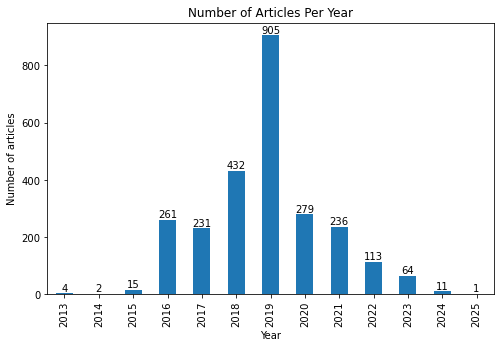

In [53]:
#we also want to see what is the timeframe of our dataset:

articles_df['year'] = articles_df['article_date_created'].dt.year

# Count articles per year
articles_per_year = articles_df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
articles_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.title('Number of Articles Per Year')
# Add numbers on top of each bar
for idx, count in enumerate(articles_per_year):
    plt.text(idx, count + 1, str(count), ha='center', va='bottom')

plt.show()


In [54]:
#as we only want articles from 2016 to 2024:
articles_df = articles_df[(articles_df['article_date_created'].dt.year >= 2016) & 
                          (articles_df['article_date_created'].dt.year <= 2024)]

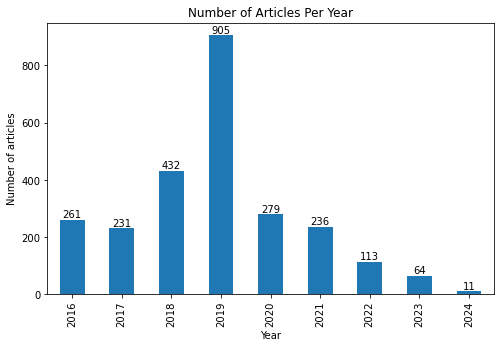

In [55]:
#we also want to see what is the timeframe of our dataset:

articles_df['year'] = articles_df['article_date_created'].dt.year

# Count articles per year
articles_per_year = articles_df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
articles_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of articles')
plt.title('Number of Articles Per Year')
# Add numbers on top of each bar
for idx, count in enumerate(articles_per_year):
    plt.text(idx, count + 1, str(count), ha='center', va='bottom')

plt.show()


In [56]:
#we save this clean data into another csv
articles_df.to_csv('cleaned_articles_2016_2024.csv', index=False)


## Tidy up the comments ##

In [36]:
#i want to keep the comments on the articles that are present in the articles dataset (so only 2016-2024)
comments_df = comments_df[comments_df['article_url'].isin(articles_df['article_url'])]

79699

In [57]:
#we create a funcction to clean the comment texts
def clean_comment_text(text):
    #lowercase
    text = text.lower()
    #remove extra white sapce
    text = re.sub(r'\s+', ' ', text).strip()
    #remove the username when they reply to eachother
    text = re.sub(r'@\w+(?:\s\w+)*:', '', text)

    return text

#we apply this function to the comment texts 
comments_df['cleaned_comment'] = comments_df['comment_text'].apply(clean_comment_text)


In [58]:
print(comments_df.head())

                                         article_url  \
0  https://www.thejournal.ie/government-seeking-e...   
1  https://www.thejournal.ie/government-seeking-e...   
2  https://www.thejournal.ie/government-seeking-e...   
3  https://www.thejournal.ie/government-seeking-e...   
4  https://www.thejournal.ie/government-seeking-e...   

                                        comment_text           comment_date  \
0  An early warning system implies passivity and ...  Feb 9th 2021, 6:53 PM   
1  @Fachtna Roe: At the very least we should be c...  Feb 9th 2021, 7:16 PM   
2  I hate to admit it but for the first time ever...  Feb 9th 2021, 7:52 PM   
3  @Mr Kayfabe: That some people on the remain si...  Feb 9th 2021, 8:11 PM   
4  @Mr Kayfabe: the EU26 stuck with us throughout...  Feb 9th 2021, 9:04 PM   

                                     cleaned_comment  
0  an early warning system implies passivity and ...  
1   at the very least we should be consulted befo...  
2  i hate to admit it b

In [59]:
#we need to convert to datetime the dates for the comment data

#first we need to remove the suffix for the dates 'st' 'nd', 'rd', 'th'
comments_df['comment_date'] = comments_df['comment_date'].str.replace(
    r'(\d+)(st|nd|rd|th)', r'\1', regex=True
)

#then we format to datetime the dates for the comment data too
comments_df['comment_date'] = pd.to_datetime(
    comments_df['comment_date'], format='%b %d %Y, %I:%M %p', errors='coerce'
)


In [60]:
#we check that the data looks fine
print(comments_df.head())

                                         article_url  \
0  https://www.thejournal.ie/government-seeking-e...   
1  https://www.thejournal.ie/government-seeking-e...   
2  https://www.thejournal.ie/government-seeking-e...   
3  https://www.thejournal.ie/government-seeking-e...   
4  https://www.thejournal.ie/government-seeking-e...   

                                        comment_text        comment_date  \
0  An early warning system implies passivity and ... 2021-02-09 18:53:00   
1  @Fachtna Roe: At the very least we should be c... 2021-02-09 19:16:00   
2  I hate to admit it but for the first time ever... 2021-02-09 19:52:00   
3  @Mr Kayfabe: That some people on the remain si... 2021-02-09 20:11:00   
4  @Mr Kayfabe: the EU26 stuck with us throughout... 2021-02-09 21:04:00   

                                     cleaned_comment  
0  an early warning system implies passivity and ...  
1   at the very least we should be consulted befo...  
2  i hate to admit it but for the first t

In [61]:
#we save again into a separate csv file these cleaned comments 
comments_df.to_csv('cleaned_comments_2016_2024.csv', index=False)